<a href="https://colab.research.google.com/github/Tarun-747/SVD-Feature-Matching-for-Image-Video-Analysis/blob/main/Assignment1_ES666_The_Chamber_of_Singular_Truths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📜 Welcome to the Order of Visioneers


You are a new intern in the ancient Order of Visioneers — a secret society tasked with recovering lost knowledge encoded in ancient visual artifacts. The Grand Archivist tells you:

> The Great Archive has been corrupted. Our only hope is to decode and reconstruct the fragments using the Algorithms of Sight. Only those who pass through the Five Gates may restore the World of Vision

But the Archivist also warns:

> Beware, interns. Those who attempt to pass the Gates with borrowed visions or false answers are cursed. Their sight is clouded, their names erased from the Hall of Records, and they are cast forever into the Void of Zero — where no Visioneer has honor, nor power. Only true effort unlocks the path.

You must pass through five gates, each guarded by a unique challenge — and each challenge maps to your assignments. Let's depart for the ***Gate 1***.

# 🌀 Gate 1 : The Chamber of Singular Truths

Theme: SVD, Image Reconstruction, Background-Foreground Separation

Deep in the archives lies a corrupted portrait of the First Visioneer. The portrait has lots of unnecessary elements and distraction. To pass the gate, you must:

> Decompose the portrait into its elemental forms, reconstruct what once was but with necessary elements only.

Run the following code to setup the assignment

In [ ]:
## Importing recipes
%matplotlib inline

import imageio
import numpy as np
import imageio.v2 as imageio
import moviepy.editor as mpe
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.animation as animation
from moviepy.editor import ImageSequenceClip

# Mounting google drive
drive.mount('/content/drive')

## Making recipes
video = mpe.VideoFileClip("/content/drive/My Drive/ES666CV/video/A/input.mp4")

def video_to_array(video):
    frames = np.array([rgb2gray(frame) for frame in video.iter_frames()])
    return frames
def array_to_video(images):
    fig, ax = plt.subplots()
    width, height = 320, 240   # pixels
    dpi = 200                  # dots per inch
    fig.set_size_inches(width / dpi, height / dpi)
    ax.axis('off')  # Remove axes
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    im = ax.imshow(images[0], cmap='gray', vmin=0, vmax=1)  # Initial frame

    def update(frame):
        im.set_array(images[frame])
        return [im]

    ani = animation.FuncAnimation(fig, update, frames=len(images), interval=1000/25)  # ~25 fps

    # Save as MP4 (requires FFmpeg; alternatively save as GIF with writer='pillow')
    ani.save('temp.mp4', writer='ffmpeg', fps=25, dpi=200)
    video = mpe.VideoFileClip('temp.mp4')
    plt.close()
    return video

def display_images_in_row(images, cmap='gray'):
    fig, axs = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
    if len(images) == 1:
        axs = [axs]
    for ax, img in zip(axs, images):
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Task1: Forge the weapon - SVD (3 Marks)

Implement Singular Value Decomposition (SVD) from scratch.
You can use Numpy's Eigen Value Decomposition for your implementation.

Write your code in the commented part only

In [ ]:
def compute_svd(matrix: np.array) -> tuple:
    # Compute eigen-decomposition of A A^T
    AAT = matrix @ matrix.T
    eigvals_u, eigvecs_u = np.linalg.eigh(AAT)

    # Sort eigenvalues in descending order
    sorted_idx = np.argsort(eigvals_u)[::-1]
    eigvals_u = eigvals_u[sorted_idx]
    eigvecs_u = eigvecs_u[:, sorted_idx]

    # Singular values = sqrt of positive eigenvalues
    singular_values = np.sqrt(np.clip(eigvals_u, a_min=0, a_max=None))

    # Compute eigen-decomposition of A^T A for V
    ATA = matrix.T @ matrix
    eigvals_v, eigvecs_v = np.linalg.eigh(ATA)
    sorted_idx_v = np.argsort(eigvals_v)[::-1]
    eigvecs_v = eigvecs_v[:, sorted_idx_v]

    # Assemble U, S, V^T
    U = eigvecs_u
    S = np.diag(singular_values)
    Vt = eigvecs_v.T

    return U, S, Vt


### Task 2: Decompose into elemental forms and reconstruct from true elements discarding unncessary elements (3 Marks)

1. Decompose image using SVD and reconstruct the image using only top $k$ singular values.
2. Experiment with different values of $k$ and visualize the results.
3. Plot reconstruction error by measuring Mean squared error between reconstructed and original image for different values of $k$.

--2025-09-08 17:33:11--  https://upload.wikimedia.org/wikipedia/commons/a/af/Golden_retriever_eating_pigs_foot.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91273 (89K) [image/jpeg]
Saving to: ‘retriever.jpg’

retriever.jpg       100%[===================>]  89.13K  --.-KB/s    in 0.06s   

2025-09-08 17:33:11 (1.44 MB/s) - ‘retriever.jpg’ saved [91273/91273]



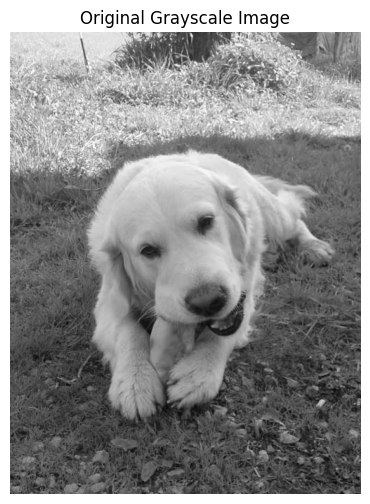

In [ ]:
!wget -O retriever.jpg https://upload.wikimedia.org/wikipedia/commons/a/af/Golden_retriever_eating_pigs_foot.jpg

image = imageio.imread("retriever.jpg")
gray_image = rgb2gray(image)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


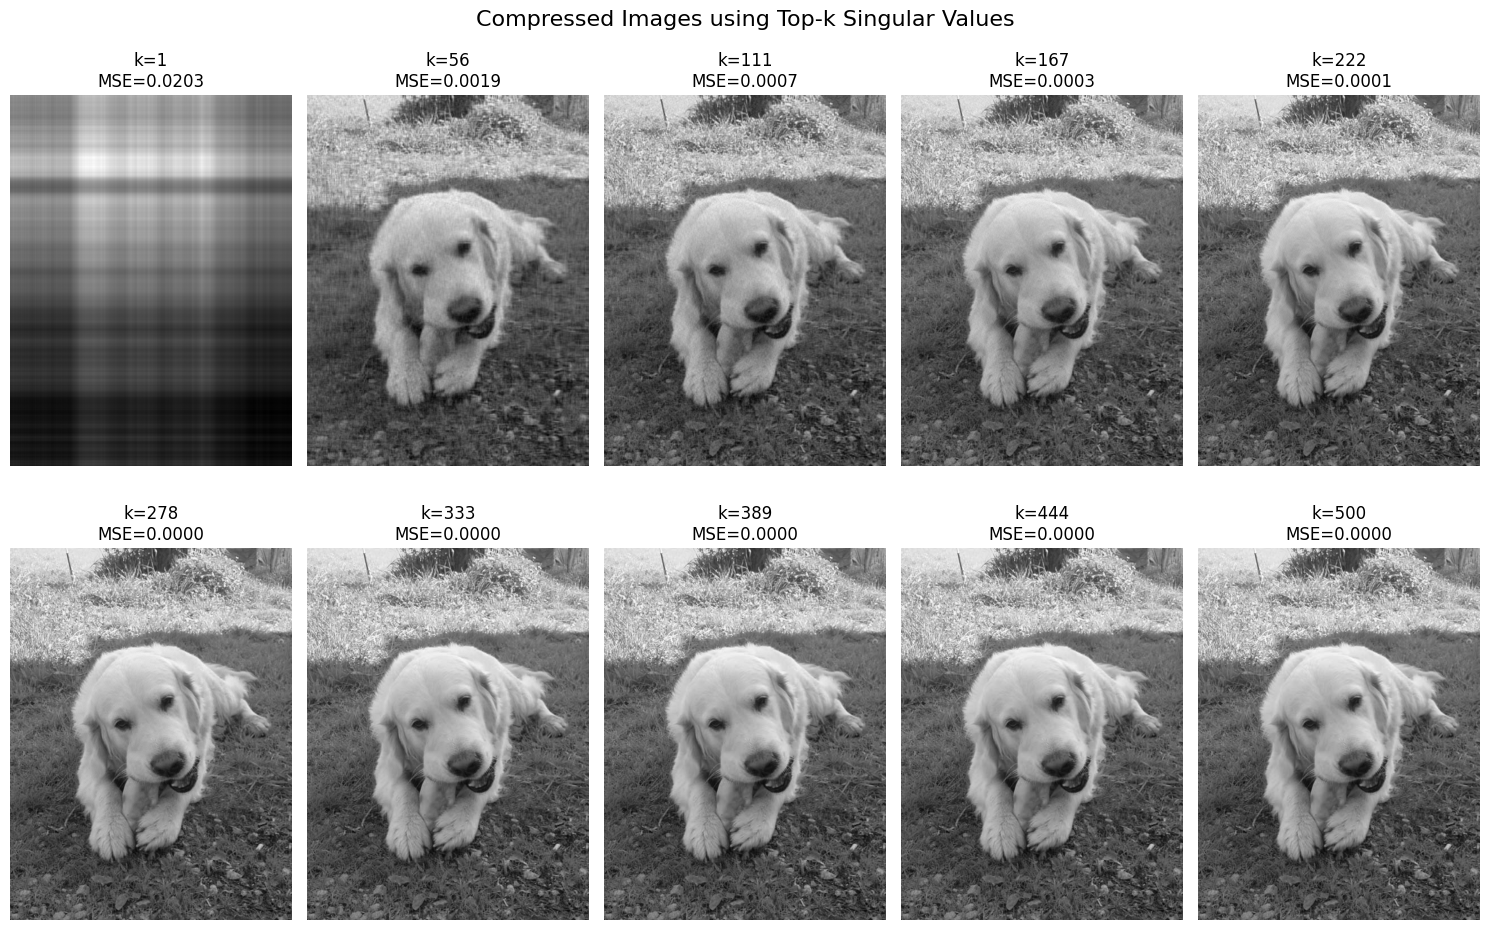

In [ ]:
def compress_image_using_topk_singular_values(image, k):
    """Compress image using top-k singular values from SVD."""
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

def reconstruction_error(original, reconstructed):
    """Compute mean squared error between original and reconstructed image."""
    return np.mean((original - reconstructed) ** 2)

# Shape of the image
m, n = gray_image.shape

# Visualize 10 compressed images ---
k_values_vis = np.linspace(1, min(m, n), 10, dtype=int)  # pick 10 evenly spaced k values

plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values_vis, 1):
    compressed_image = compress_image_using_topk_singular_values(gray_image, k)
    mse = reconstruction_error(gray_image, compressed_image)

    plt.subplot(2, 5, i)  # 2 rows × 5 cols = 10 images
    plt.imshow(compressed_image, cmap="gray")
    plt.title(f"k={k}\nMSE={mse:.4f}")
    plt.axis("off")

plt.suptitle("Compressed Images using Top-k Singular Values", fontsize=16)
plt.tight_layout()
plt.show()

# # --- Part 2: Plot Reconstruction Error vs k ---
# k_values = np.linspace(1, min(m, n), 100, dtype=int)
# errors = [reconstruction_error(gray_image, compress_image_using_topk_singular_values(gray_image, k))
#           for k in k_values]

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, errors, marker='o')
# plt.xlabel("k (Number of singular values)")
# plt.ylabel("Reconstruction Error (MSE)")
# plt.title("Reconstruction Error vs k")
# plt.grid(True)
# plt.show()


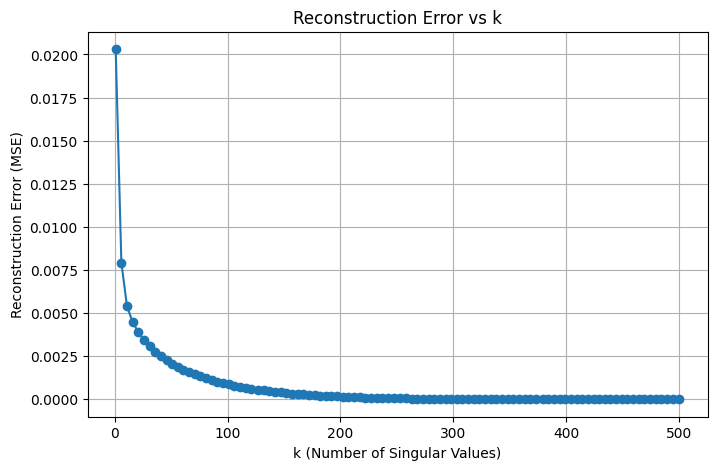

In [ ]:
# Ensure k_values are valid integers between 1 and min(m,n)
k_values = np.linspace(1, min(m, n), 100, dtype=int)
k_values = np.unique(k_values)  # remove duplicates (linspace can repeat ends)
errors = []

# Compute reconstruction error for each k
for k in k_values:
    compressed_image = compress_image_using_topk_singular_values(gray_image, k)
    mse = reconstruction_error(gray_image, compressed_image)
    errors.append(mse)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(k_values, errors, marker='o')
plt.xlabel("k (Number of Singular Values)")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs k")
plt.grid(True)
plt.show()


What value of $k$ do you think is enough for the image reconstruction. What is the benefit of this method?

Answer: Based on the plot, it is clear that the error of reconstruction reduces at a very fast rate when small values of are used.
k, and with approximately 50 -60 singular values the error curve begins flattening. What this implies is that the majority of the significant information in the image has already been captured with the initial 50 to 60 singular values and further addition causes only slight enhancement.

The advantage of the process is that it enables us to attain a high compression but maintain high visual quality. We do not have to store the entire image matrix but only a few singular values and associated vectors, which use less storage space and are much faster to transmit, without loss of detail.

### Task 3: Separate the truth from chaos and distraction (Marks 4)

Perform background-foreground separation using SVD.

In this task you might need help. So, the archivist called an expert who is too old to code but wise enough to guide you.

The expert will guide you and you will have to code it. First lets welcom the expert, "Prof. Dhoomketu" from Dholakpur

In [ ]:
video.ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In the above video, we want to focus on the building. But, the moving cars are distracting us. We want to remove them. Follow the instruction by Prof. Dhoomketu to complete this task

***Prof. Dhoomketu***: Currently we have video frames of shape (num_frames, height, width). Write a function that transforms this tensor to matrix of shape ~~(height, width, num_frames) [there was typo here as announced in google classroom]~~ (height * width, num_frames). Ensure that the order of the frames is preserved.

In [ ]:
frames = video_to_array(video)

def tarnsform_video_frames(frames: np.array):
    """
    Transforms video frames from shape (num_frames, height, width)
    to a 2D matrix of shape (height*width, num_frames)
    preserving the order of frames.
    """
    num_frames, height, width = frames.shape
    # Reshape each frame to a column and stack all frames
    matrix = frames.reshape(num_frames, height*width).T  # shape: (height*width, num_frames)
    return matrix

matrix = tarnsform_video_frames(frames)


***Prof. Dhoomketu***: Reconstruct the matrix using SVD with with very few of the top singular values (2 or 4 ). And rearrange the matrix to the original frame shape.

In [ ]:
# Low-rank approximation of the video matrix
def low_rank_approximation(matrix, rank=2):
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)
    U_r = U[:, :rank]
    S_r = np.diag(S[:rank])
    Vt_r = Vt[:rank, :]
    return U_r @ S_r @ Vt_r

# Reconstruct the matrix using only top singular values (background)
reconstructed_matrix = low_rank_approximation(matrix, rank=2)

# Reshape back to video frames
num_frames, height, width = frames.shape
reconstructed_frames = reconstructed_matrix.T.reshape(num_frames, height, width)


***Prof. Dhoomketu***: Now visualize the first frames of the original and reconstructed videos. Just run the below code.
I have brought the visualization codes for you.

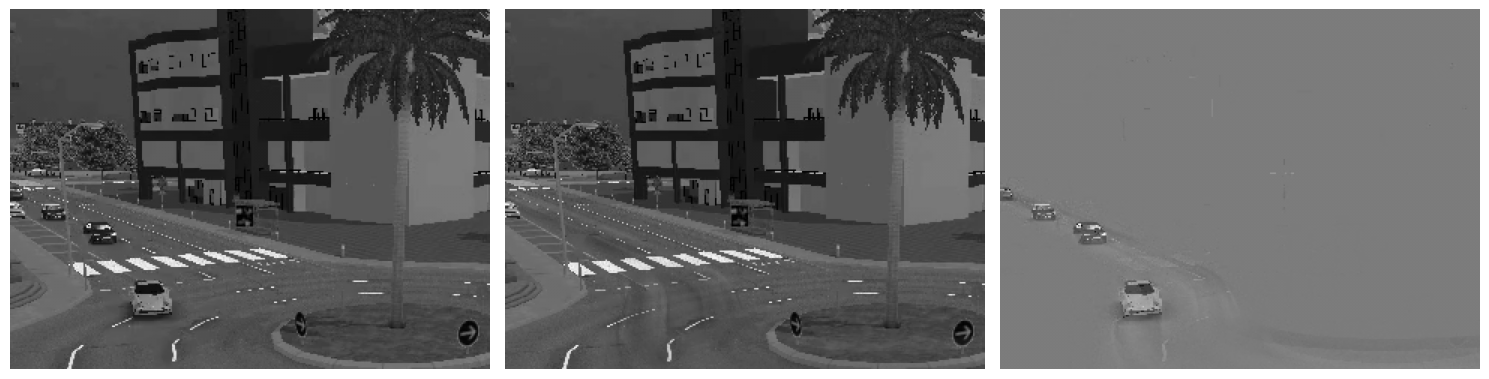

In [ ]:
display_images_in_row([frames[0], reconstructed_frames[0], frames[0] - reconstructed_frames[0]])

***Prof. Dhoomketu***: If you see that the cars are gone from the frames, it means you where able to successfully perform the separation of the distracting cars from the background.
Run the following code to visualize the separated cars from the video

In [ ]:
cars_only = frames - reconstructed_frames
cars_only = array_to_video(cars_only)
cars_only.ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


***Prof. Dhoomketu***: If you where able to successfully separate the cars, congratulations! But, I want to check if you understand whats going on behind the scenes? Why do you think the SVD-based approach was effective in this case?

HINT: Complete the following code for hints. Resize the original matrix and reconstructed matrix to shape (200,200). Visualize the resized matrices to get the hint. You can use the following syntax for resizing:

resized_original = resize(original, (200,200),anti_aliasing=False)

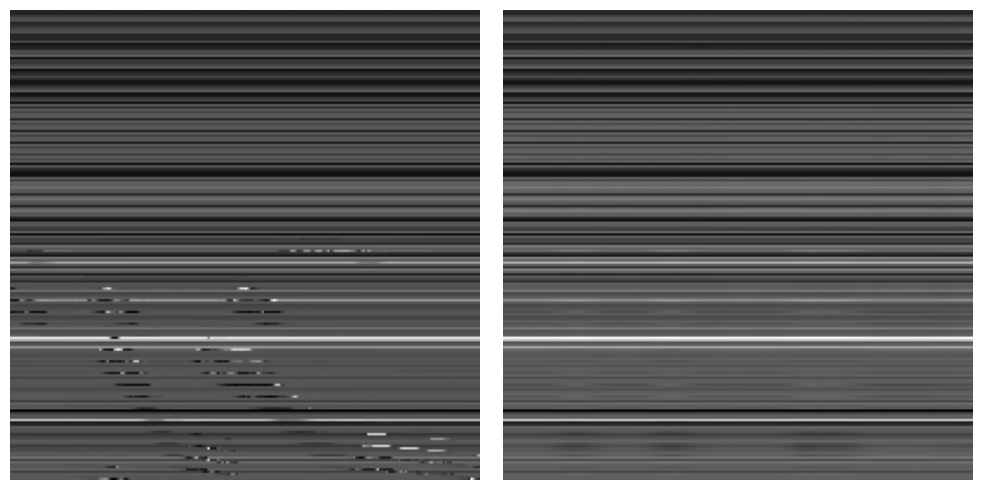

In [ ]:
# Resize the original and reconstructed matrices for visualization
resized_original_matrix = resize(matrix, (200, 200), anti_aliasing=False)
resized_reconstructed_matrix = resize(reconstructed_matrix, (200, 200), anti_aliasing=False)

# Display them side by side
display_images_in_row([resized_original_matrix, resized_reconstructed_matrix])


***Prof. Dhoomketu***: Q1: What do you observe? Answer my previous question using the observation here to complete the assignment.
Q2: Why did we resized the matrices for visualization?

Answer: Comparison of the resized matrices reveals that the reconstructed matrix approximately preserves the stationary background (the building) and the moving cars disappear indicating that the large singular values represent the stable, low-rank components and the small singular values represent the dynamic transformations such as cars. The matrices were resized to 200 x 200 to facilitate easier visualization as it would have been hard to view patterns when using the large matrices.